# Reading housing.csv file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\Rohit\\coursera\\coursera\\housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.loc[:,'median_income'] *= 10000

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY


# Creating train and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

In [8]:
#train_set.head()

In [9]:
#train_set.info()

# stratified sampling

In [10]:
# Divide by 1.5 to limit the number of income categories
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
# Label those above 5 as 5
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [12]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Looking for correlations among attributes

In [13]:
corr_matrix = train_set.corr()


In [14]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.148438
longitude            -0.041830
population           -0.024618
total_bedrooms        0.052690
households            0.068976
housing_median_age    0.107050
total_rooms           0.136167
median_income         0.689752
median_house_value    1.000000
Name: median_house_value, dtype: float64

The correlation ranges from -1 to 1.This shows that median_house_value has a strong correlation with median_income, total rooms, and housing_median_age.We however need to know the nmer of rooms per houehold since the total_rooms information is complete unless otherwise.Moreover t_otal_bedrooms have a positive correlation with the median_house_value so it is important to know the number of bedroom per total_room.Populaton of a disrrict affects the housing valueIn soe areas more population leds to decrease in th housing prices..We will fnd out the population per household.

# Adding attributes

In [15]:
train_set['room_per_household'] = train_set['total_rooms'] / train_set['households']

In [16]:
train_set['bedrooms_total_room'] = train_set['total_bedrooms'] / train_set['total_rooms']

In [17]:
train_set['population_per_household'] = train_set['population'] / train_set['households']

In [18]:
train_set['bedroom_per_households'] = train_set['total_bedrooms'] / train_set['households']

In [19]:
train_set.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedrooms_total_room,population_per_household,bedroom_per_households
11604,-118.01,33.79,23.0,2663.0,430.0,1499.0,403.0,57837.0,258000.0,<1H OCEAN,6.60794,0.161472,3.719603,1.066998


# Rechecking the correlation

In [20]:
corr_matrix = train_set.corr()

corr_matrix['median_house_value'].sort_values()

bedrooms_total_room        -0.255375
latitude                   -0.148438
bedroom_per_households     -0.054384
longitude                  -0.041830
population_per_household   -0.027295
population                 -0.024618
total_bedrooms              0.052690
households                  0.068976
housing_median_age          0.107050
total_rooms                 0.136167
room_per_household          0.157999
median_income               0.689752
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [21]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_per_household',
       'bedrooms_total_room', 'population_per_household',
       'bedroom_per_households'],
      dtype='object')

In [22]:
y_tr = train_set['median_house_value']

In [23]:
train_set.drop('median_house_value', inplace=True, axis=1)

# Replacng Nan values with the median

In [24]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [25]:
train_set_num = train_set.drop('ocean_proximity', axis=1)

In [26]:
imputer.fit(train_set_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [27]:
train_set_num.median().values

array([-1.18490000e+02,  3.42550000e+01,  2.90000000e+01,  2.12300000e+03,
        4.33000000e+02,  1.16500000e+03,  4.09000000e+02,  3.53485000e+04,
        5.22679628e+00,  2.03144654e-01,  2.81690895e+00,  1.04807692e+00])

In [28]:
X = imputer.transform(train_set_num)

In [29]:
X.shape

(16512, 12)

In [30]:
x_train = pd.DataFrame(X, columns=train_set_num.columns,
                          index = list(train_set.index.values))

# Merging the numerical and categoricaldateset

In [31]:
train_xtr = pd.concat([x_train, train_set['ocean_proximity']], axis=1)

In [32]:
train_xtr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,bedrooms_total_room,population_per_household,bedroom_per_households,ocean_proximity
11604,-118.01,33.79,23.0,2663.0,430.0,1499.0,403.0,57837.0,6.607940,0.161472,3.719603,1.066998,<1H OCEAN
10897,-117.84,33.73,20.0,2572.0,732.0,1534.0,669.0,24211.0,3.844544,0.284603,2.292975,1.094170,<1H OCEAN
12076,-117.60,33.87,15.0,7626.0,1570.0,3823.0,1415.0,34419.0,5.389399,0.205875,2.701767,1.109541,INLAND
13277,-117.64,34.09,34.0,2839.0,659.0,1822.0,631.0,30500.0,4.499208,0.232124,2.887480,1.044374,INLAND
308,-122.18,37.77,51.0,2107.0,471.0,1173.0,438.0,32552.0,4.810502,0.223541,2.678082,1.075342,NEAR BAY


In [33]:
train_xtr.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'room_per_household', 'bedrooms_total_room', 'population_per_household',
       'bedroom_per_households', 'ocean_proximity'],
      dtype='object')

# Converting categorical attribute to int type

In [34]:
x_tr = pd.get_dummies(train_xtr)

In [35]:
x_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,bedrooms_total_room,population_per_household,bedroom_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11604,-118.01,33.79,23.0,2663.0,430.0,1499.0,403.0,57837.0,6.607940,0.161472,3.719603,1.066998,1,0,0,0,0
10897,-117.84,33.73,20.0,2572.0,732.0,1534.0,669.0,24211.0,3.844544,0.284603,2.292975,1.094170,1,0,0,0,0
12076,-117.60,33.87,15.0,7626.0,1570.0,3823.0,1415.0,34419.0,5.389399,0.205875,2.701767,1.109541,0,1,0,0,0
13277,-117.64,34.09,34.0,2839.0,659.0,1822.0,631.0,30500.0,4.499208,0.232124,2.887480,1.044374,0,1,0,0,0
308,-122.18,37.77,51.0,2107.0,471.0,1173.0,438.0,32552.0,4.810502,0.223541,2.678082,1.075342,0,0,0,1,0


# Feature scaling

In [36]:
train_scaled = (x_tr-x_tr.min())/(x_tr.max()-x_tr.min())

In [37]:
train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,bedrooms_total_room,population_per_household,bedroom_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11604,0.631474,0.132837,0.431373,0.067679,0.066574,0.052309,0.066108,0.364395,0.043754,0.068302,0.002140,0.021749,1.0,0.0,0.0,0.0,0.0
10897,0.648406,0.126461,0.372549,0.065364,0.113439,0.053535,0.109850,0.132495,0.022769,0.205115,0.000992,0.022554,1.0,0.0,0.0,0.0,0.0
12076,0.672311,0.141339,0.274510,0.193906,0.243482,0.133679,0.232528,0.202894,0.034500,0.117638,0.001321,0.023010,0.0,1.0,0.0,0.0,0.0
13277,0.668327,0.164718,0.647059,0.072155,0.102110,0.063618,0.103601,0.175867,0.027740,0.146804,0.001471,0.021078,0.0,1.0,0.0,0.0,0.0
308,0.216135,0.555792,0.980392,0.053538,0.072936,0.040895,0.071863,0.190018,0.030104,0.137267,0.001302,0.021996,0.0,0.0,0.0,1.0,0.0


In [38]:
train_scaled.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'room_per_household', 'bedrooms_total_room', 'population_per_household',
       'bedroom_per_households', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Training a model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_scaled, y_tr)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_scaled, y_tr)))
#print('Accuracy of K-NN classifier on test set: {:.2f}'
   #  .format(knn.score(X_test_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.21


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5).fit(train_scaled, y_tr)


In [41]:
dt.score(train_scaled, y_tr)

0.050387596899224806

In [42]:
from sklearn.linear_model import LinearRegression 

linreg = LinearRegression().fit(train_scaled, y_tr)

print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(train_scaled, y_tr)))


linear model intercept: -1.1492544831149915e+18
linear model coeff:
[-2.80546056e+05 -2.50656437e+05  5.54016765e+04  1.12347306e+05
  2.95957106e+04 -1.31055749e+06  7.58226145e+05  5.82690878e+05
  8.16748529e+05  2.90152028e+05  6.37561398e+04 -5.92703561e+05
  1.14925448e+18  1.14925448e+18  1.14925448e+18  1.14925448e+18
  1.14925448e+18]
R-squared score (training): 0.660


In [43]:
from sklearn.metrics import mean_squared_error

prediction = linreg.predict(train_scaled)
lin_mse = mean_squared_error(y_tr, prediction)
lin_rmse = np.sqrt(lin_mse)

In [44]:
lin_rmse

67211.53115895219

In [45]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(train_scaled, y_tr)
print('R-squared score (training): {:.3f}'
     .format(linridge.score(train_scaled, y_tr)))

R-squared score (training): 0.628


In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(train_scaled, y_tr)

prediction_ = forest.predict(train_scaled)
forest_mse = mean_squared_error(y_tr, prediction_)
forest_rmse = np.sqrt(forest_mse)

In [47]:
forest_rmse

21995.61410655849

In [48]:
forest.score(train_scaled, y_tr)

0.9635670361407687

# fine tuning

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_scaled, y_tr,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
tree_rmse_scores

array([52154.26598262, 56363.14454769, 48760.83102756, 53535.3949403 ,
       52310.19306788, 52018.22411571, 52851.03533543, 50308.43133846,
       53917.90771805, 51810.52640352])

In [51]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_scaled, y_tr)
housing_predictions = svm_reg.predict(train_scaled)
svm_mse = mean_squared_error(y_tr, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

117288.75242680515

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_scaled, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

# Cleaning test set

In [54]:
test_set['room_per_household'] = test_set['total_rooms'] / test_set['households']

In [55]:
test_set['bedrooms_total_room'] = test_set['total_bedrooms'] / test_set['total_rooms']

In [56]:
test_set['population_per_household'] = test_set['population'] / test_set['households']

In [57]:
test_set['bedroom_per_households'] = test_set['total_bedrooms'] / test_set['households']

In [58]:
y_ts = test_set['median_house_value']

In [59]:
test_set.drop('median_house_value', inplace=True, axis=1)

In [60]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [61]:
test_set_num = test_set.drop('ocean_proximity', axis=1)

In [62]:
imputer.fit(test_set_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [63]:
X = imputer.transform(test_set_num)

In [64]:
x_test = pd.DataFrame(X, columns=test_set_num.columns,
                          index = list(test_set.index.values))

In [65]:
test_x = pd.concat([x_test, test_set['ocean_proximity']], axis=1)

In [66]:
x_ts = pd.get_dummies(test_x)

In [67]:
test_scaled = (x_ts-x_ts.min())/(x_ts.max()-x_ts.min())

In [68]:
test_scaled.shape

(4128, 17)

# Testing the model on the test set

In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

prediction_ = forest.predict(test_scaled)
forest_mse = mean_squared_error(y_ts, prediction_)
forest_rmse = np.sqrt(forest_mse)

In [70]:
forest.score(test_scaled, y_ts)

0.5601873188988005

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(train_scaled, y_tr)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(test_set) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(train_scaled, y_tr)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(test_set) 

print('Test set AUC: ', roc_auc_score(y_ts, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

C:\Users\priyanka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(train_scaled, y_tr)

prediction_ = forest.predict(test_scaled)
forest_mse = mean_squared_error(y_ts, prediction_)
forest_rmse = np.sqrt(forest_mse)

In [72]:
forest_rmse

75869.48675677764

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes = [10], alpha = 5,
                       random_state = 0, solver='lbfgs', verbose=0)

clf_ = clf.fit(train_scaled, y_tr)

In [ ]:
clf_.predict(test_set, y_ts)

In [73]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_scaled)

final_mse = mean_squared_error(y_ts, final_predictions)
final_rmse = np.sqrt(final_mse)

In [74]:
final_rmse

70027.56946881513

# visualizations

In [3]:
import seaborn as sns

In [4]:
df_ = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


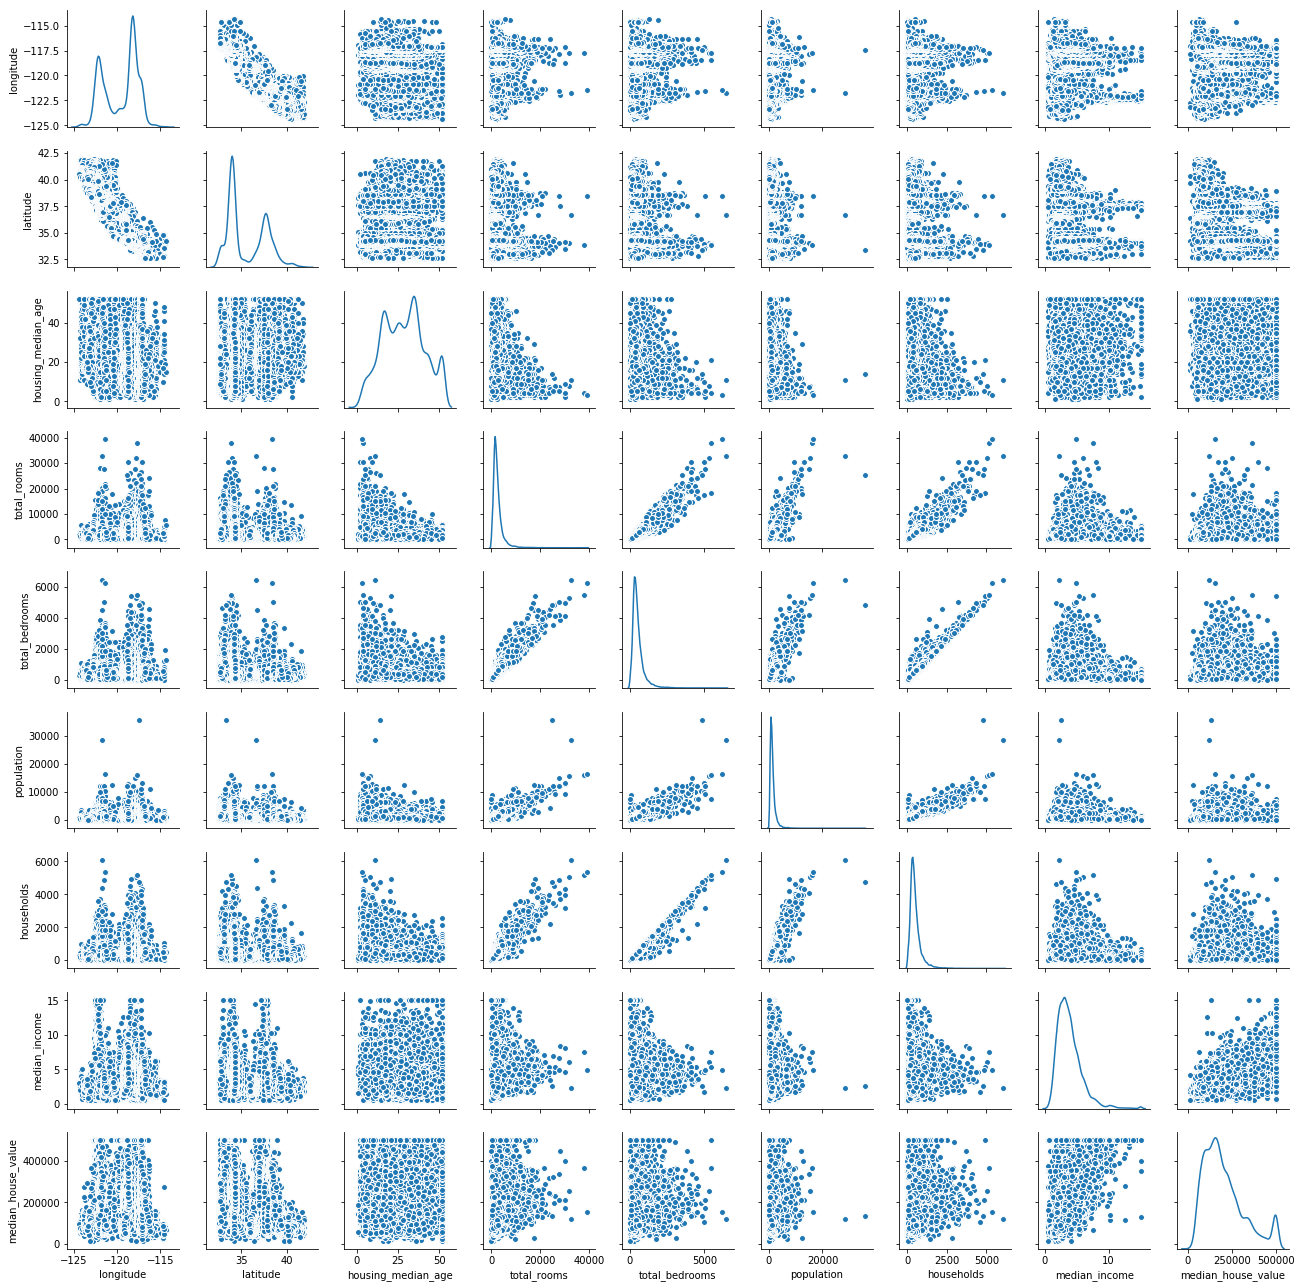

In [6]:
sns.pairplot(df_, diag_kind="kde", size=2)

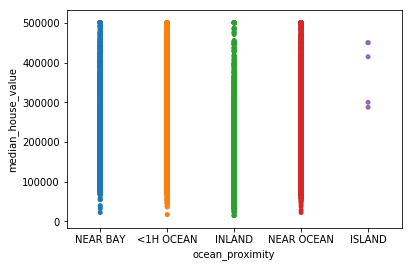

In [18]:
sns.stripplot(x=df.ocean_proximity, y=df.median_house_value, data=df);

In [15]:
cf = df_[['median_income', 'median_house_value']]

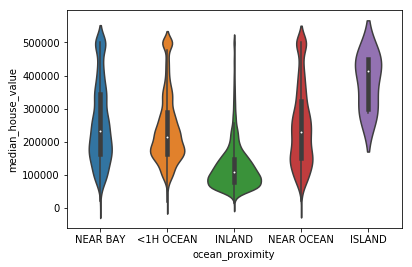

In [10]:
sns.violinplot(x=df.ocean_proximity, y=df.median_house_value, data=df);

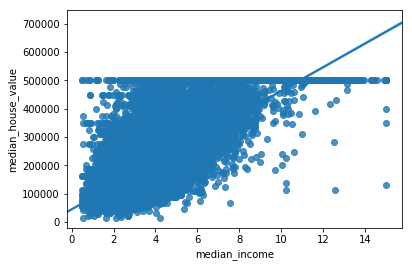

In [11]:
sns.regplot(x=df.median_income, y=df.median_house_value, data=df);

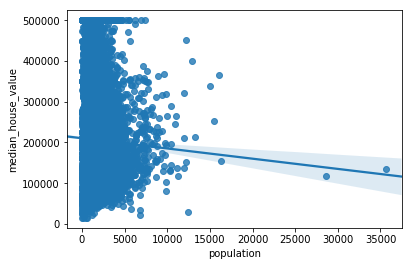

In [12]:
sns.regplot(x=df.population, y=df.median_house_value, data=df);

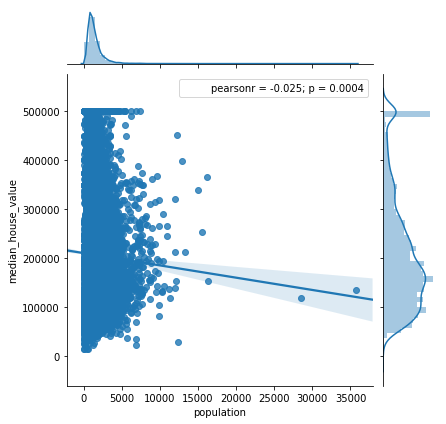

In [15]:
sns.jointplot(x=df.population, y=df.median_house_value, data=df, kind="reg");

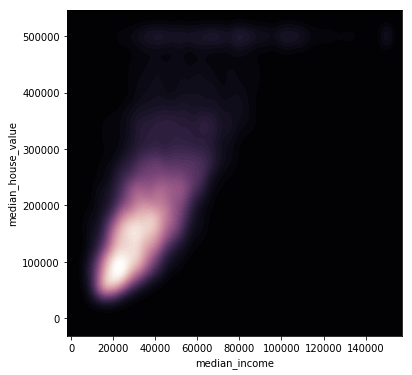

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.median_income, df.median_house_value, cmap=cmap, n_levels=60, shade=True);

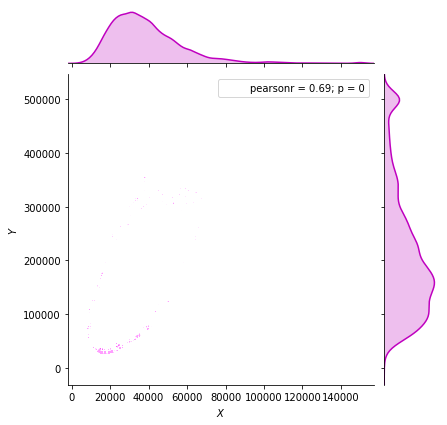

In [19]:
g = sns.jointplot(x=df.median_income, y=df.median_house_value, data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

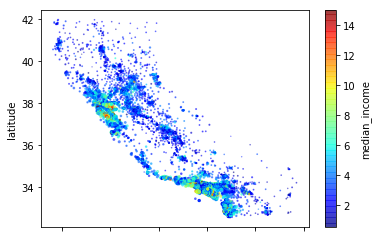

In [38]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=df["median_house_value"]/100000,c="median_income", cmap=plt.get_cmap("jet"))